# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch,
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [ ]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [ ]:
model = torch.nn.Linear(2, 1, bias=False) #Criação de rede com 2 entradas (x0 e bias) e 1 saída (y)

### Verificando a inicialização dos parâmetros

In [ ]:
model.weight.data = torch.zeros(1,2) #Zerar os pesos criados ao iniciar a rede
torch.nn.init.uniform(model.weight.data, -0.1, 0.1) #Criar pesos com valores entre -0.1 e 0.1
model.weight.data

<ipython-input-41-ed48249d8ca5>:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1) #Criar pesos com valores entre -0.1 e 0.1


tensor([[-0.0480, -0.0267]])

### Testando o predict da rede

In [ ]:
Variable(torch.ones((5,2)))

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
model.weight.data

tensor([[-0.0480, -0.0267]])

In [ ]:
# x . wT -- Multiplicação de Matrizes X(5,2) e wT (2,1) --> -0,0480 + (-0,0267) = -0,0747

model(Variable(torch.ones((5,2))))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

# Nova seção

### Definindo função de perda e otimizador

Documentação

https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html

https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [ ]:
criterion = nn.MSELoss() # Função de perda (MSE)
optimizer = optim.SGD(model.parameters(), lr=0.3) #Gradiente descendente estocástico com learning rate de 0.3

### Laço de treinamento

In [ ]:
num_epochs = 120  # Número total de épocas de treinamento
w0_list = []      # Lista vazia para armazenar os valores de w0
w1_list = []      # Lista vazia para armazenar os valores de w1
losses=[]

for epoch in range(num_epochs):
    # Variables pyTorch
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    #Cálculo dos valores preditos
    out = model(inputs)

    # Alimenta as listas w0_list e w1_list com os valores dos pesos
    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    # Cálculo da função de perda usando MSELoss como criterion

    loss = criterion(out, target)
    losses.append(loss.item())

    optimizer.zero_grad() #Zera os gradientes acumulados das épocas anteriores
    loss.backward()
    optimizer.step() #Atualiza os pesos com base nos parametros informados (learning rate 0.3)


    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/120], loss: 0.024990
Epoch[40/120], loss: 0.022381
Epoch[60/120], loss: 0.021554
Epoch[80/120], loss: 0.021291
Epoch[100/120], loss: 0.021208
Epoch[120/120], loss: 0.021182


## Avaliação

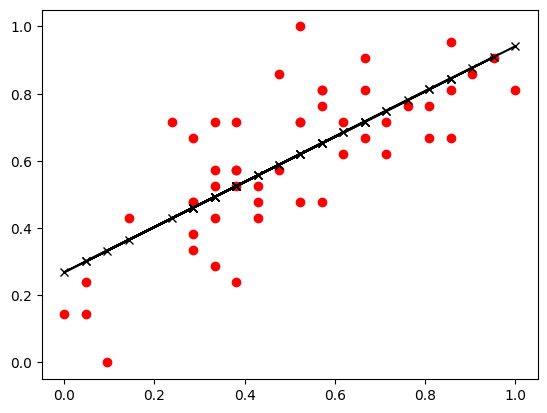

In [ ]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

In [ ]:
#1.
#Cálculo da perda após o treinamento do modelo com 120 épocas

y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)

tensor(0.0212, grad_fn=<MseLossBackward0>)


- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

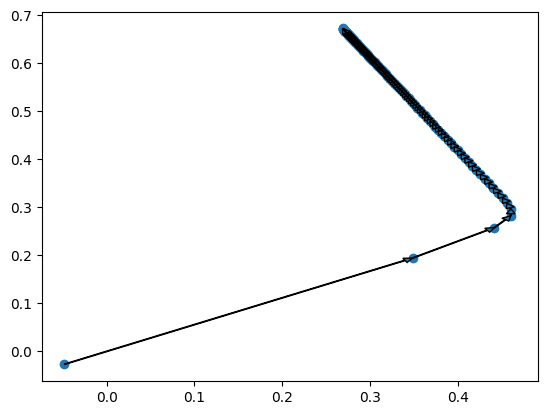

In [ ]:
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

- 3) Procure sobrepor a função de perda neste gráfico. (exercício mais difícil).

Text(0.5, 1.0, 'Evolução da perda ao longo das épocas')

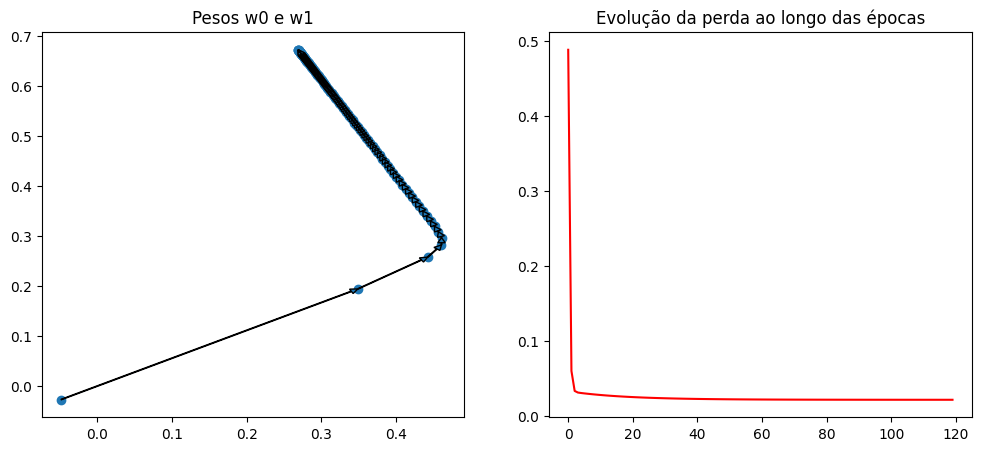

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        ax[0].arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

ax[1].plot(losses,color='red')

ax[0].set_title('Pesos w0 e w1')

ax[1].set_title('Evolução da perda ao longo das épocas')

# Aprendizados

**criterion**: Definição da função perda a ser utilizada na Rede. Neste exemplo foi utilizada nn.MSELoss

Outros exemplos
- nn.CrossEntropyLoss

- nn.PoissonNLLLoss

- nn.GaussianNLLLoss

https://pytorch.org/docs/stable/nn.html#loss-functions

**optimizer**: Definição do otimizador do gradiente descendente. Neste exemplo foi utilizado gradiente descendente estocásitco com Learning Rate de 0.3

Outrox exemplos:
- Adam
- ASGCD

https://pytorch.org/docs/stable/optim.html

A função backward() é utilizada para calcular o gradiente descendente.

Importante destacar que após cada época do laço de treinamento é necessário zerar o gradiente descendente acumulado da época anterior.

A médida que o treinamento passa pelas épocas, os valores dos pesos otimizados se aproximam da solução análitica para os pesos.

#Conceitos fundamentais

**Redes Neurais:**: Uma rede neural é um programa, ou modelo, de aprendizado de máquina que toma decisões de uma forma semelhante ao cérebro humano, utilizando processos que imitam a maneira como os neurônios biológicos trabalham juntos para identificar fenômenos, ponderar opções e chegar a conclusões.

Toda rede neural é composta por camadas de nós, ou neurônios artificiais: uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada nó se conecta a outros e possui seu próprio peso e limiar associados

**Gradiente Descendente:**O gradiente descendente é um algoritmo de otimização comumente usado para treinar modelos de aprendizado de máquina e redes neurais. Ele treina modelos de aprendizado de máquina ao minimizar os erros entre os resultados previstos e os reais.

Os conceitos de Redes Neurais e gradientes descendentes foram utilizados nesse projeto para realizar um algoritmo de regressão linear com base nos dados Iris.


**Etapas do Laço de treinamento:**
- Predição dos valores com base nos dados de entrada (X)

- Cálculo da função perda. MSE foi usada no projeto.
  
  Perda de entropia cruzada / binária poderia ser usada para modelos de classificação.

- Cálculo do gradiente (utilizando a função perda e o learning rate)

- Atualização dos pesos iniciais usando o gradiente calculado

**Learning rate:** Taxa de aprendizagem. Parâmetro fundamental para o cálculo o gradiente descendente. Pequenos valores de Learning rate podem levar a um aprendizado mais lenta (mais épocas necessárias), grandes valores podem levar a um treinamento instável com dificuldade para convergir para a melhor solução